# Cross Signal Trade

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import yfinance as yf

In [2]:
# From 16.08.2007 to 26.04.2022
bco = pd.read_csv('/Users/romaindeleze/Desktop/BSc/Romain_WI_TZ/8.Semester/BA/Daten/Brent_Crude_Oil')

In [3]:
bco.head()

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC
0,2007-08-16,69.769997,-0.026449,1,29.797228,9.756045,-0.572856,-0.066622
1,2007-08-17,70.440002,0.009557,0,37.710864,17.926851,-0.563372,-0.010257
2,2007-08-20,69.849998,-0.008411,0,33.868557,11.206854,-0.584877,-0.027159
3,2007-08-21,68.690002,-0.016746,1,27.466358,6.351211,-0.665806,-0.032399
4,2007-08-22,68.699997,0.000145,1,27.604705,6.649574,-0.718980,-0.021507


In [4]:
# Add data / transform data

In [5]:
# Add moving avarage to the dataset
bco['3_week'] = bco['Close'].rolling(15).mean().shift() # 5*3 Trading days = 15 Days
bco['9_week'] = bco['Close'].rolling(45).mean().shift() # 5*9 Trading days = 45 Days
bco[44:50]

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC,3_week,9_week
44,2007-10-18,84.599998,0.017529,0,78.073526,98.892597,1.880058,0.072243,79.484666,NaN
45,2007-10-19,83.790001,-0.009621,0,70.295228,89.922523,1.955213,0.094150,79.789333,76.208667
46,2007-10-22,83.269997,-0.006225,0,65.420567,84.163893,1.950672,0.074590,80.097333,76.520222
47,2007-10-23,82.849998,-0.005057,1,61.426060,79.512749,1.891635,0.054071,80.472666,76.805333
48,2007-10-24,84.370003,0.018180,1,69.294757,96.345579,1.944102,0.052651,80.837333,77.094222
49,2007-10-25,87.480003,0.036198,1,79.153322,99.243728,2.209307,0.086034,81.303334,77.442667


In [6]:
# Add long-short Signal Column
bco['LS_signal'] = np.where(bco['3_week'] > bco['9_week'],1,0) # Long Signal
bco['LS_signal'] = np.where(bco['3_week'] < bco['9_week'],-1,bco['LS_signal']) # Short Signal

# Add only long Signal
bco['L_signal'] = np.where(bco['3_week'] > bco['9_week'],1,0) # Long Signal

# drop na values
bco.dropna(inplace=True)

In [7]:
# Calculate return/system retruns

# System returns from long-short System
bco['LS_system_return'] = bco['LS_signal'] * bco['Log_Returns']

# System returns from only long System
bco['L_system_return'] = bco['L_signal'] * bco['Log_Returns']

bco.head()

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC,3_week,9_week,LS_signal,L_signal,LS_system_return,L_system_return
45,2007-10-19,83.790001,-0.009621,0,70.295228,89.922523,1.955213,0.094150,79.789333,76.208667,1,1,-0.009621,-0.009621
46,2007-10-22,83.269997,-0.006225,0,65.420567,84.163893,1.950672,0.074590,80.097333,76.520222,1,1,-0.006225,-0.006225
47,2007-10-23,82.849998,-0.005057,1,61.426060,79.512749,1.891635,0.054071,80.472666,76.805333,1,1,-0.005057,-0.005057
48,2007-10-24,84.370003,0.018180,1,69.294757,96.345579,1.944102,0.052651,80.837333,77.094222,1,1,0.018180,0.018180
49,2007-10-25,87.480003,0.036198,1,79.153322,99.243728,2.209307,0.086034,81.303334,77.442667,1,1,0.036198,0.036198


In [8]:
# Calculate return/system retruns Test set

h = round(len(bco['Close'])*0.2)

bco['B_a_H_system_test'] = bco.iloc[-h:]['Log_Returns']

# System returns from 1 year long-short System
bco['LS_system_return_test'] = bco.iloc[-h:]['LS_signal'] * bco.iloc[-h:]['Log_Returns']

# System returns from 1 year only long System
bco['L_system_return_test'] = bco.iloc[-h:]['L_signal'] * bco.iloc[-h:]['Log_Returns']

bco.head()

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC,3_week,9_week,LS_signal,L_signal,LS_system_return,L_system_return,B_a_H_system_test,LS_system_return_test,L_system_return_test
45,2007-10-19,83.790001,-0.009621,0,70.295228,89.922523,1.955213,0.094150,79.789333,76.208667,1,1,-0.009621,-0.009621,NaN,NaN,NaN
46,2007-10-22,83.269997,-0.006225,0,65.420567,84.163893,1.950672,0.074590,80.097333,76.520222,1,1,-0.006225,-0.006225,NaN,NaN,NaN
47,2007-10-23,82.849998,-0.005057,1,61.426060,79.512749,1.891635,0.054071,80.472666,76.805333,1,1,-0.005057,-0.005057,NaN,NaN,NaN
48,2007-10-24,84.370003,0.018180,1,69.294757,96.345579,1.944102,0.052651,80.837333,77.094222,1,1,0.018180,0.018180,NaN,NaN,NaN
49,2007-10-25,87.480003,0.036198,1,79.153322,99.243728,2.209307,0.086034,81.303334,77.442667,1,1,0.036198,0.036198,NaN,NaN,NaN


In [9]:
bco['LS_entry'] = bco.LS_signal.diff()

bco['L_entry'] = bco.L_signal.diff()

bco.head()

,Date,Close,Log_Returns,Pred_Signal,RSI,K_percent,MACD,ROC,3_week,9_week,LS_signal,L_signal,LS_system_return,L_system_return,B_a_H_system_test,LS_system_return_test,L_system_return_test,LS_entry,L_entry
45,2007-10-19,83.790001,-0.009621,0,70.295228,89.922523,1.955213,0.094150,79.789333,76.208667,1,1,-0.009621,-0.009621,NaN,NaN,NaN,NaN,NaN
46,2007-10-22,83.269997,-0.006225,0,65.420567,84.163893,1.950672,0.074590,80.097333,76.520222,1,1,-0.006225,-0.006225,NaN,NaN,NaN,0.0,0.0
47,2007-10-23,82.849998,-0.005057,1,61.426060,79.512749,1.891635,0.054071,80.472666,76.805333,1,1,-0.005057,-0.005057,NaN,NaN,NaN,0.0,0.0
48,2007-10-24,84.370003,0.018180,1,69.294757,96.345579,1.944102,0.052651,80.837333,77.094222,1,1,0.018180,0.018180,NaN,NaN,NaN,0.0,0.0
49,2007-10-25,87.480003,0.036198,1,79.153322,99.243728,2.209307,0.086034,81.303334,77.442667,1,1,0.036198,0.036198,NaN,NaN,NaN,0.0,0.0


# Buy Sell Chart (Full Dataset)

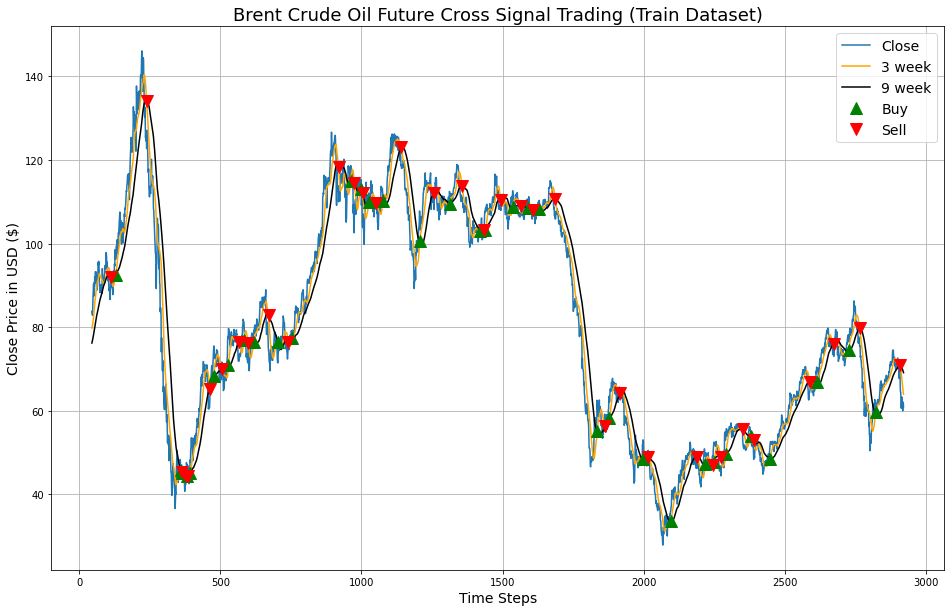

In [10]:
plt.figure(figsize=(16,10))
plt.grid(True)
plt.title('Brent Crude Oil Future Cross Signal Trading (Train Dataset)', fontsize=18)
plt.xlabel('Time Steps', fontsize=14)
plt.ylabel('Close Price in USD ($)', fontsize=14)
plt.plot(bco.iloc[:-h]['Close'], label='Close')
plt.plot(bco.iloc[:-h]['3_week'], label='3 week', color = 'orange')
plt.plot(bco.iloc[:-h]['9_week'], label='9 week', color = 'black')
plt.plot(bco[:-h].loc[bco.LS_entry == 2].index, bco[:-h]['3_week'][bco.LS_entry == 2],'^',
        color = 'green', markersize=12, label='Buy')
plt.plot(bco[:-h].loc[bco.LS_entry == -2].index, bco[:-h]['9_week'][bco.LS_entry == -2],'v',
        color = 'red', markersize=12, label='Sell')
plt.legend(loc='best',fontsize=14)

# Buy Sell Chart (Testset)

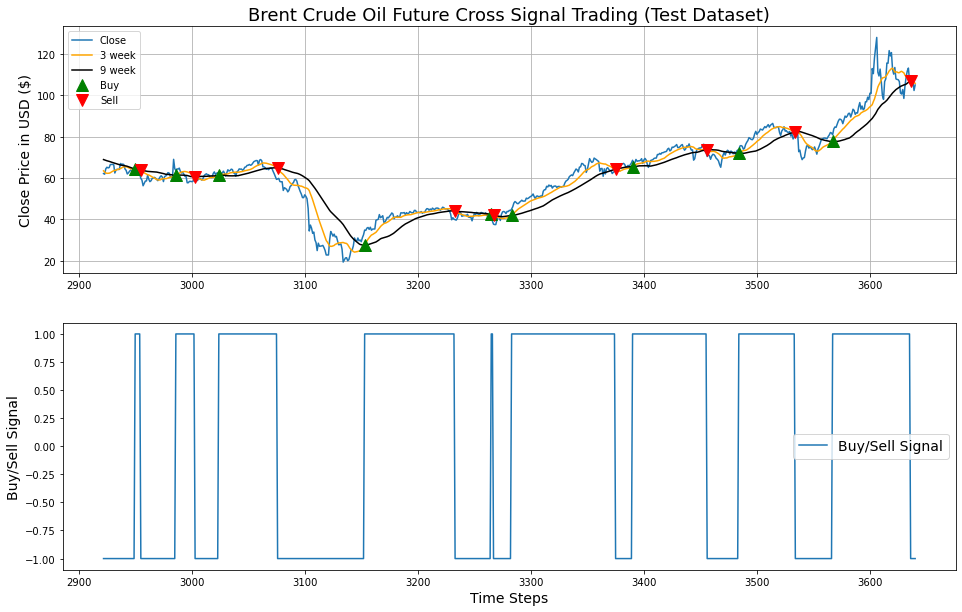

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(16,10))
axs[0].set_title('Brent Crude Oil Future Cross Signal Trading (Test Dataset)', fontsize=18)
axs[0].set_ylabel('Close Price in USD ($)', fontsize=14)
axs[0].grid(True)
axs[0].plot(bco.iloc[-h:]['Close'], label='Close')
axs[0].plot(bco.iloc[-h:]['3_week'], label='3 week', color = 'orange')
axs[0].plot(bco.iloc[-h:]['9_week'], label='9 week', color = 'black')
axs[0].plot(bco[-h:].loc[bco.LS_entry == 2].index, bco[-h:]['3_week'][bco.LS_entry == 2],'^',
        color = 'green', markersize=12, label='Buy')
axs[0].plot(bco[-h:].loc[bco.LS_entry == -2].index, bco[-h:]['9_week'][bco.LS_entry == -2],'v',
        color = 'red', markersize=12, label='Sell')
axs[0].legend(loc='best')


axs[1].plot(bco.iloc[-h:]['LS_signal'], label ='Buy/Sell Signal')
axs[1].set_ylabel('Buy/Sell Signal', fontsize=14)
axs[1].set_xlabel('Time Steps', fontsize=14)
axs[1].legend(loc='best', fontsize=14)

plt.show()

# Traging Rules

### The trading strategy is very simple to understand. The following rules are used:

#### 1. The 3 weeks moving average crosses the 9 weeks moving average from the bottom to the top so it is a buy signal.

#### 2. The 3 weeks moving average crosses the 9 weeks moving average from top to bottom, it is a sell signal.

#### We have tried this strategy with two different signals. The first signal long-short buys at the buy signal and makes shortselling at the sell signal. The second signal only long buys at the buy signal and sells at the sell signal.

# Comparison Cross_Signal_Strategie vs. Buy and Hold (Full Dataset)

In [12]:
# Calculat Performance of whole Dataset
B_a_H = np.exp(bco['Log_Returns']).cumprod()
L_perf = np.exp(bco['L_system_return']).cumprod()
LS_perf = np.exp(bco['LS_system_return']).cumprod() 

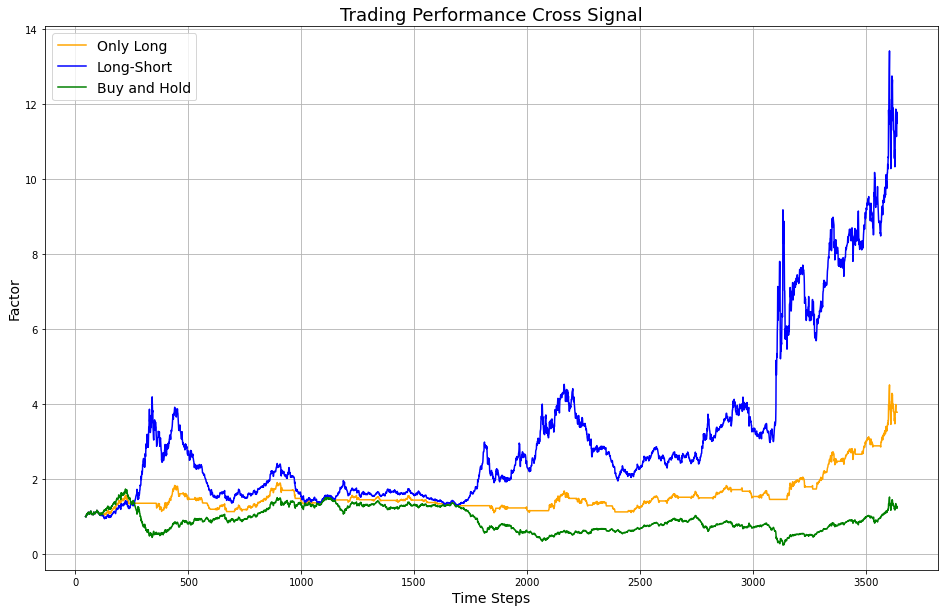

In [13]:
plt.figure(figsize=(16,10))
plt.title('Trading Performance Cross Signal', fontsize=18)
plt.ylabel('Factor', fontsize=14)
plt.xlabel('Time Steps', fontsize=14)
plt.grid(True)
plt.plot(L_perf, label='Only Long', color = 'orange')
plt.plot(LS_perf, label='Long-Short', color = 'blue')
plt.plot(B_a_H, label='Buy and Hold', color = 'green')
plt.legend(loc='best', fontsize=14)

# Comparison Cross Signal Strategie vs. Buy and Hold (Testset)

In [14]:
# Calculat Performance Testset
B_a_H_y1 = np.exp(bco['B_a_H_system_test']).cumprod()
L_perf_y1 = np.exp(bco['L_system_return_test']).cumprod()
LS_perf_y1 = np.exp(bco['LS_system_return_test']).cumprod() 

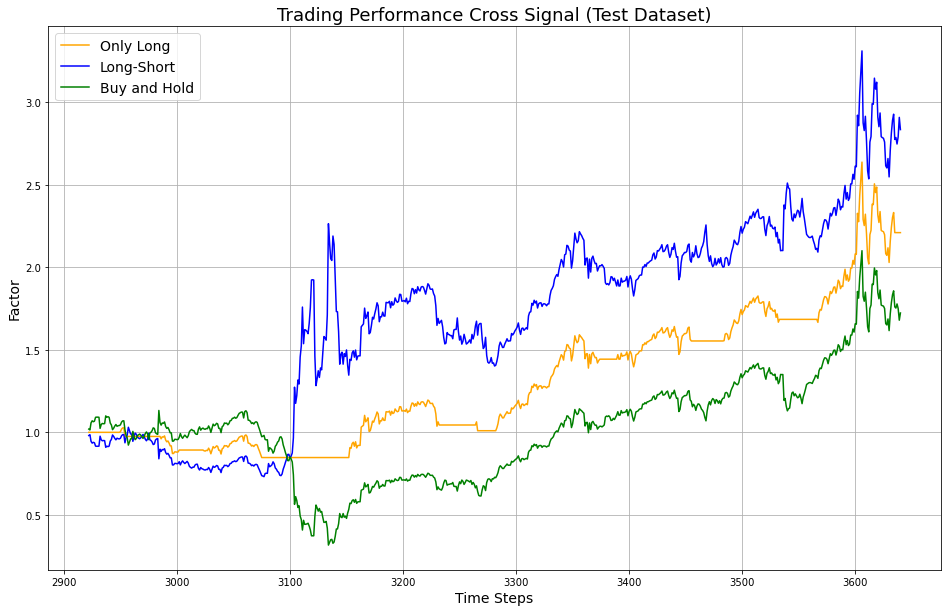

In [15]:
plt.figure(figsize=(16,10))
plt.title('Trading Performance Cross Signal (Test Dataset)', fontsize=18)
plt.ylabel('Factor', fontsize=14)
plt.xlabel('Time Steps', fontsize=14)
plt.grid(True)
plt.plot(L_perf_y1, label='Only Long', color = 'orange')
plt.plot(LS_perf_y1, label='Long-Short', color = 'blue')
plt.plot(B_a_H_y1, label='Buy and Hold', color = 'green')
plt.legend(loc='best',fontsize=14)

# Sharpe Ratios (Testset)

In [16]:
# Shapre Ratio Calculation (Testdata)
trading_days_Y = 5*52 

# Only Long
perf = bco['L_system_return_test']
perf_sharpe = np.sqrt(trading_days_Y) * np.mean(perf) / (np.sqrt(np.var(perf)))

# Long Short
perf1 = bco['LS_system_return_test']
perf_sharpe1 = np.sqrt(trading_days_Y) * np.mean(perf1) / (np.sqrt(np.var(perf1)))

# Buy and Hold
perf2 = bco['B_a_H_system_test']
perf_sharpe2 = np.sqrt(trading_days_Y) * np.mean(perf2) / (np.sqrt(np.var(perf2)))

In [17]:
# Performance Dataset
CS_Perf_OL = L_perf_y1
CS_Perf_LS = LS_perf_y1

CS_Perf_data = pd.DataFrame()
CS_Perf_data['CS_Perf_OL'] = CS_Perf_OL
CS_Perf_data['CS_Perf_LS'] = CS_Perf_LS

CS_Perf_data.to_csv('/Users/romaindeleze/Desktop/BSc/Romain_WI_TZ/8.Semester/BA/Daten/CS_Perf_data')

# Profit Factor (Testset)

In [18]:
L_profit = L_perf_y1.iloc[-1]

LS_profit = LS_perf_y1.iloc[-1]

B_a_H_profit = B_a_H_y1.iloc[-1]

# Performance Table

In [19]:
#create data
data = [["Buy and Hold", round(perf_sharpe2,2), round(B_a_H_profit,2)], 
        ["Only Long", round(perf_sharpe,2), round(L_profit,2)], 
        ["Long Short", round(perf_sharpe1,2), round(LS_profit,2)]]
  
#define header names
col_names = ["Strategie", "Sharp Ratio", "Profit Factor"]
  
#display table
print('Cross Signal Trade')
print(tabulate(data, headers=col_names))

Cross Signal Trade
Strategie       Sharp Ratio    Profit Factor
------------  -------------  ---------------
Buy and Hold           0.36             1.72
Only Long              0.95             2.21
Long Short             0.69             2.83


[*********************100%***********************]  1 of 1 completed


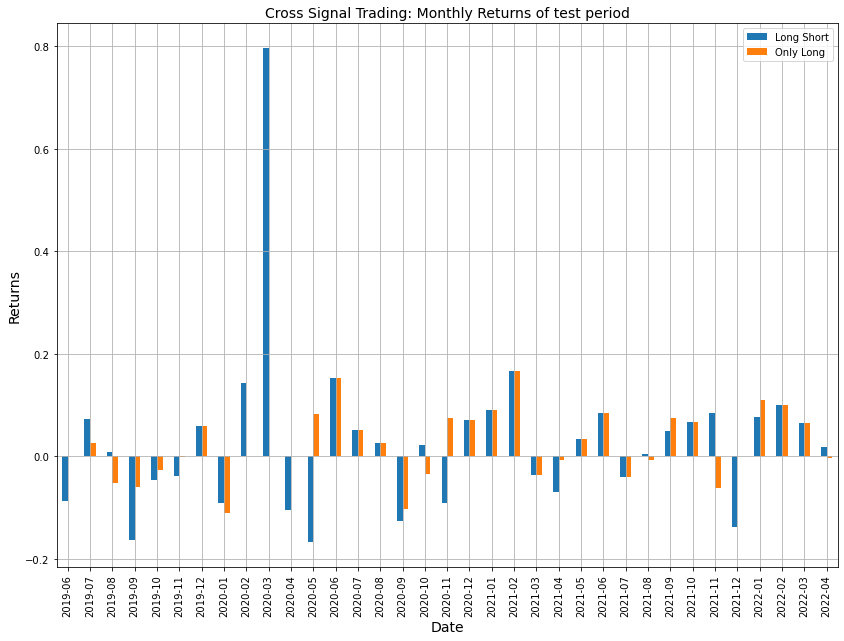

In [20]:
#Indexing
dat = yf.download('BZ=F', start='2007-08-16',end = "2022-04-26",period='1d')
end_len = len(dat["Close"])
long_short = perf.dropna()
start_len = end_len - len(long_short)
index = dat["Close"][start_len:end_len].index
perf1 = perf1.dropna()
perf = perf.dropna()
perf1.index = index
perf.index = index




#Create Monthly Returns Long Short
da = perf1.groupby([(perf1.index.year),(perf1.index.month)]).sum()


monthly_ret_LS = da.values
n = len(monthly_ret_LS)
monthly_ret_LS = pd.DataFrame(monthly_ret_LS,index = pd.date_range(start='6/1/2019', freq='M', periods=n))



#Create Monthly Returns Long
da1 = perf.groupby([(perf.index.year),(perf.index.month)]).sum()
monthly_ret_OL = da1.values
monthly_ret_OL = pd.DataFrame(monthly_ret_OL,index = pd.date_range(start='6/1/2019', freq='M', periods=n))



#Connect DF
mon_ret = pd.concat([monthly_ret_LS, monthly_ret_OL], axis=1)
mon_ret.columns = ["Long Short","Only Long"]



#x Axis
x_ax = pd.period_range('6/1/2019', '2022-04-30', freq='M').strftime('%Y-%m')
mon_ret.index = x_ax




#Plot the barplot



ax = mon_ret.plot.bar(figsize=(14,10), rot = 0)
plt.title("Cross Signal Trading: Monthly Returns of test period",fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.xticks(rotation=90)
plt.ylabel('Returns', fontsize=14)
plt.legend(loc='best')
plt.grid()